# LISTA 1 - Análise de Estoque de Produtos
###### Luiz Eduardo Paiva Ribeiro
###### Lucas Levy de Oliveira Barros

1. Carregar o CSV: 

In [2]:
import pandas as pd

df = pd.read_csv('estoque.csv', sep=',')
df.head() 


,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario
0,29/03/2023,Monitor,Eletrônicos,97,398.63
1,30/08/2023,Desodorante,Higiene,45,272.30
2,07/12/2023,Arroz,Alimentos,34,487.97
3,15/07/2023,Sabão em Pó,Limpeza,181,419.03
4,14/08/2023,Notebook,Eletrônicos,87,458.93


2. Calcular o valor total por produto

In [3]:
df['Valor_Estoque'] = df['Quantidade'] * df['Preco_Unitario']

valor_total_por_produto = df.groupby('Produto')['Valor_Estoque'].sum().reset_index()

valor_total_por_produto.head()


,Produto,Valor_Estoque
0,Arroz,719645.46
1,Açúcar,479149.04
2,Café,476571.30
3,Desinfetante,748190.68
4,Desodorante,874621.57


3. Filtrar produtos com baixo estoque

In [4]:
produtos_baixo = df[df['Quantidade'] < 10]
produtos_baixo.head()


,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario,Valor_Estoque
30,08/12/2023,Notebook,Eletrônicos,6,54.61,327.66
35,02/02/2023,Mouse,Eletrônicos,4,393.09,1572.36
47,21/03/2023,Papel Higiênico,Higiene,3,317.44,952.32
79,27/03/2023,Água Sanitária,Limpeza,9,305.53,2749.77
102,26/11/2023,Arroz,Alimentos,2,423.23,846.46


4. Salvar os Resultados

a) Exportar produtos com baixo estoque para um novo CSV:

In [5]:

produtos_baixo.to_csv('estoque_baixo.csv', index=False)


b) Salvar o valor total por produto em uma planilha Excel com abas por categoria:

In [6]:
with pd.ExcelWriter('valor_total_estoque.xlsx') as writer:
    categorias = df['Categoria'].unique()
    for cat in categorias:
        df_cat = df[df['Categoria'] == cat]
        
        df_cat_agrupado = df_cat.groupby('Produto', as_index=False)['Valor_Estoque'].sum()
        
        df_cat_agrupado.to_excel(writer, sheet_name=cat, index=False)


5. Identificar o Produto Mais Valioso por Categoria

In [7]:
def produto_mais_valioso(grupo):
    return grupo.loc[grupo['Valor_Estoque'].idxmax()]

produto_valioso_por_categoria = df.groupby('Categoria').apply(produto_mais_valioso).reset_index(drop=True)

resultado_produto_valioso = produto_valioso_por_categoria[['Categoria', 'Produto', 'Valor_Estoque']]
resultado_produto_valioso


C:\Users\Luiz Eduardo\AppData\Local\Temp\ipykernel_15632\2373883746.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  produto_valioso_por_categoria = df.groupby('Categoria').apply(produto_mais_valioso).reset_index(drop=True)


,Categoria,Produto,Valor_Estoque
0,Alimentos,Açúcar,81886.09
1,Eletrônicos,Notebook,90268.20
2,Higiene,Sabonete,92627.24
3,Limpeza,Detergente,83029.62


6. Calcular o Valor Total do Estoque por Categoria

In [8]:
valor_total_por_categoria = df.groupby('Categoria')['Valor_Estoque'].sum().reset_index()

valor_total_por_categoria = valor_total_por_categoria.sort_values(by='Valor_Estoque', ascending=False)
valor_total_por_categoria


,Categoria,Valor_Estoque
1,Eletrônicos,4477677.37
2,Higiene,4238200.02
3,Limpeza,3804669.34
0,Alimentos,3383136.59


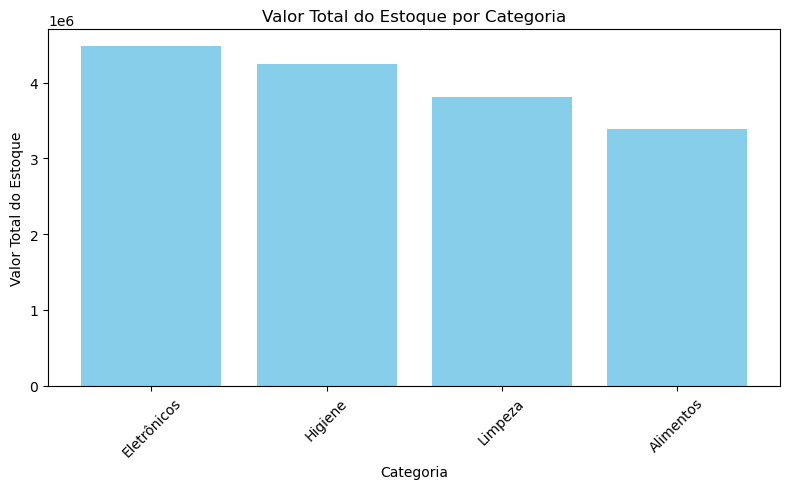

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(valor_total_por_categoria['Categoria'], valor_total_por_categoria['Valor_Estoque'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Valor Total do Estoque')
plt.title('Valor Total do Estoque por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7. Classificar Produtos em Faixas de Estoque

In [10]:
condicoes = [
    (df['Quantidade'] < 10),
    (df['Quantidade'] >= 10) & (df['Quantidade'] <= 50),
    (df['Quantidade'] > 50)
]
valores = ['Baixo', 'Médio', 'Alto']

df['Nivel_Estoque'] = pd.cut(df['Quantidade'],
                             bins=[-float('inf'), 10, 50, float('inf')],
                             labels=['Baixo', 'Médio', 'Alto'],
                             right=False)


contagem_niveis = df['Nivel_Estoque'].value_counts().reset_index()
contagem_niveis.columns = ['Nivel_Estoque', 'Contagem']
contagem_niveis


,Nivel_Estoque,Contagem
0,Alto,465
1,Médio,117
2,Baixo,18


Bônus: 8. Análise Temporal

In [11]:
df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'], format='%d/%m/%Y')

df['Ano_Mes'] = df['Data_Atualizacao'].dt.to_period('M')

analise_temporal = df.groupby('Ano_Mes').agg(
    num_atualizacoes=('Data_Atualizacao', 'count'),
    quantidade_media=('Quantidade', 'mean')
).reset_index()

analise_temporal['Ano_Mes'] = analise_temporal['Ano_Mes'].dt.to_timestamp()

analise_temporal


,Ano_Mes,num_atualizacoes,quantidade_media
0,2023-01-01,44,94.363636
1,2023-02-01,27,98.111111
2,2023-03-01,49,94.224490
3,2023-04-01,50,106.140000
4,2023-05-01,50,92.580000
5,2023-06-01,59,103.881356
6,2023-07-01,54,104.333333
7,2023-08-01,53,108.622642
8,2023-09-01,53,109.245283
9,2023-10-01,56,109.107143


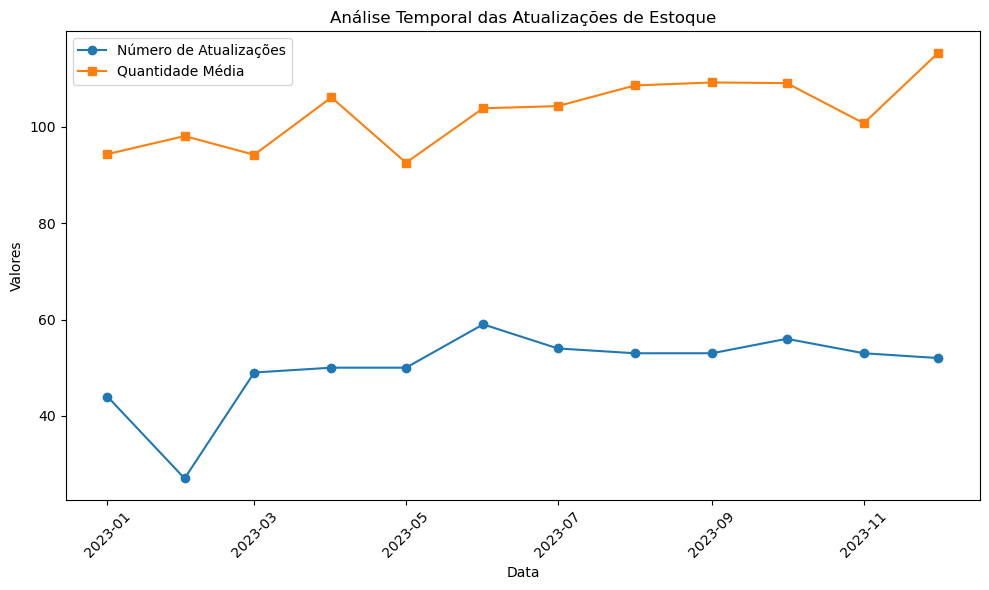

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(analise_temporal['Ano_Mes'], analise_temporal['num_atualizacoes'], marker='o', label='Número de Atualizações')
plt.plot(analise_temporal['Ano_Mes'], analise_temporal['quantidade_media'], marker='s', label='Quantidade Média')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Análise Temporal das Atualizações de Estoque')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()